In [1]:
import numpy as np  # Importamos NumPy para manipular datos numéricos
import librosa  # Librería para procesamiento de audio
import librosa.display  # Para visualizar audio
import IPython.display as ipd  # Para widgets de audio
import matplotlib.pyplot as plt  # Para gráficas
%matplotlib inline
from scipy.io import wavfile
import os


In [2]:
audio_path = "examples/game_of_thrones.wav"  # Ruta del archivo de audio
audio, sr = librosa.load(audio_path, sr=None, mono=False)  # Carga en estéreo

# Mostrar información
print(f"Frecuencia de muestreo: {sr} Hz")  
print(f"Número de canales: {audio.shape[0]}")  # Si tiene 2, es estéreo
print(f"Tamaño del archivo: {round(audio.nbytes / (1024 * 1024), 2)} MB")  

Frecuencia de muestreo: 44100 Hz
Número de canales: 2
Tamaño del archivo: 7.02 MB


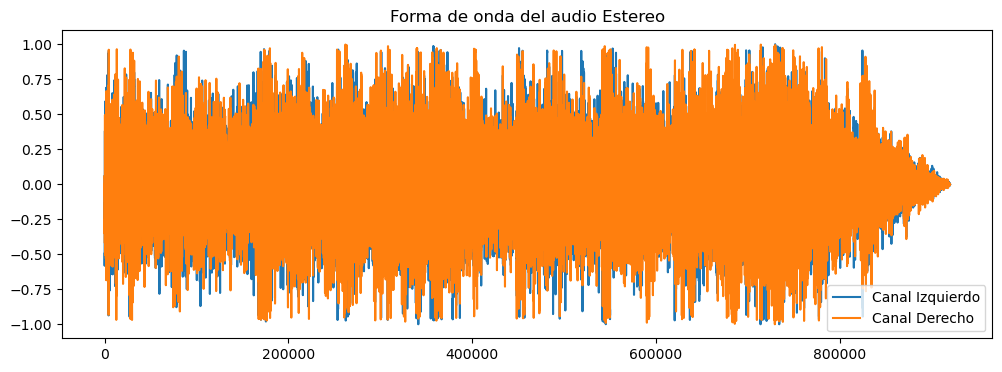

In [3]:
plt.figure(figsize=(12, 4))
plt.plot(audio[0], label="Canal Izquierdo")
plt.plot(audio[1], label="Canal Derecho")
plt.title("Forma de onda del audio Estereo")
plt.legend()
plt.show()

In [4]:
audio_mono = librosa.to_mono(audio)  # Convertimos a mono
print(f"Número de canales después de la conversión: {audio_mono.ndim}")  

Número de canales después de la conversión: 1


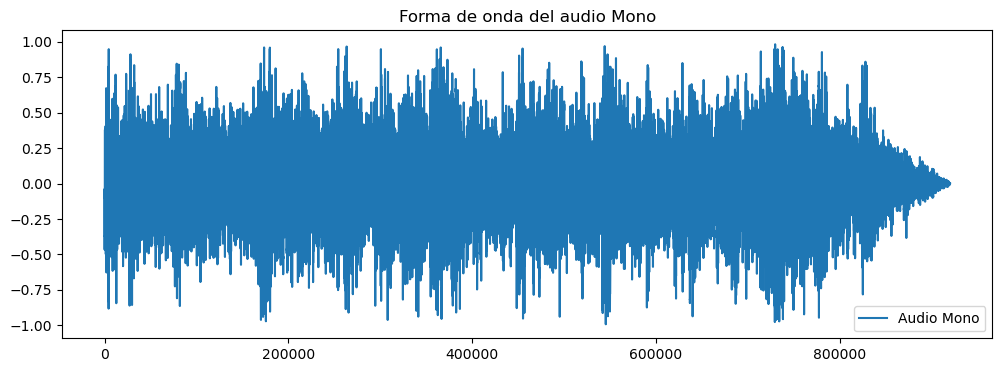

In [5]:
plt.figure(figsize=(12, 4))
plt.plot(audio_mono, label="Audio Mono")  
plt.title("Forma de onda del audio Mono")  
plt.legend()
plt.show()

In [6]:
#La frecuencia de muestreo se puede definir como el número de muestras que se toman por segundo para digitalizar la señal.
#El aliasing es un proceso que ocurre cuando la frecuencia de muestreo no es suficiente para representar la señal.
#La profundidad de bits son los bits que necesitamos para representar cada muestra.
#El Ancho de Banda es el rango de frecuencias representativas que se pueden reproducir (En este caso al estar hablando de audio)
#La Tasa de Bits son la cantidad de bits que se procesan o en este caso transmiten por segundo

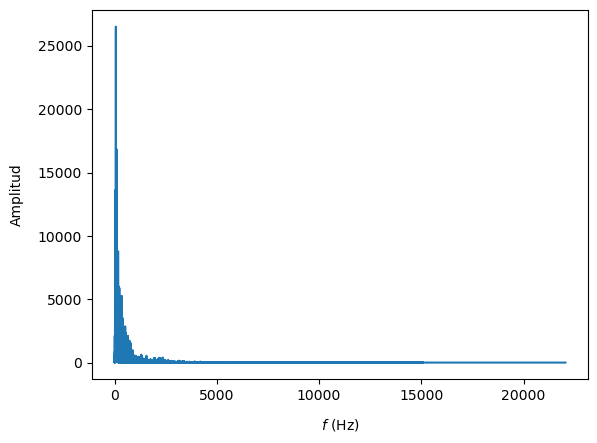

In [7]:
#Transformada de Fourier al audio mono

n = len(audio_mono)
Fs = sr
# Calculando la Transformada Rapida de Fourier (FFT) en audio mono.
ch_Fourier = np.fft.fft(audio_mono)  # ch1
abs_ch_Fourier = np.abs(ch_Fourier)    # Calcula la magnitud del espectro

plt.plot(np.linspace(0, Fs/2, n//2), abs_ch_Fourier[:n//2])
plt.ylabel('Amplitud', labelpad=10)
plt.xlabel('$f$ (Hz)', labelpad=10)
plt.show()

# La FFT descompone la señal en sus componentes de frecuencia, 
#permitiendo identificar las frecuencias predominantes y el contenido espectral.


Epsilon: 0.123
Valor de corte para la energia del espectro: 28236360.0
Mascara: [False False False ... False False False]
Frecuencia de corte f0 (Hz): 22050


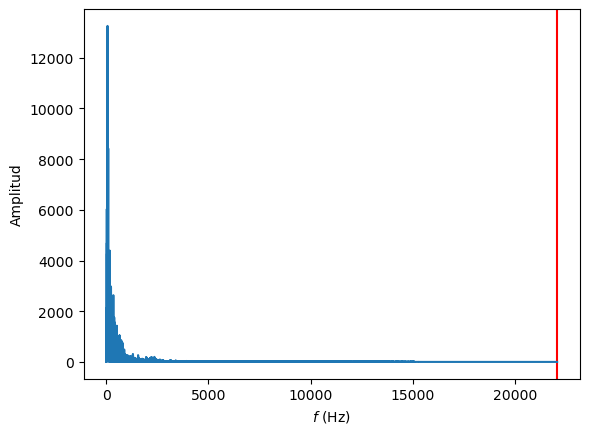

In [8]:
# la energia del espectro que NO conservamos.
eps = [1e-5, .002, .041, .063, .086, .101, .123]

eps = eps[6]
print(f'Epsilon: {eps}')
thr_spec_energy = (1 - eps) * np.sum(abs_ch_Fourier)
print(f'Valor de corte para la energia del espectro: {thr_spec_energy}')

abs_ch_Fourier_half = abs_ch_Fourier[:n//2] 
spec_energy = np.cumsum(abs_ch_Fourier_half)

frequencies_to_remove = thr_spec_energy < spec_energy  
print(f'Mascara: {frequencies_to_remove}')



f0 = (len(frequencies_to_remove) - np.sum(frequencies_to_remove)) * (Fs/2) / (n//2)
print(f'Frecuencia de corte f0 (Hz): {int(f0)}')

# Graficamos.
plt.axvline(f0, color='r')
plt.plot(np.linspace(0, Fs/2, n//2), abs_ch_Fourier_half / 2) 
plt.ylabel('Amplitud')
plt.xlabel('$f$ (Hz)')
plt.show()

In [9]:
# Calculamos el factor D de downsampling.
D = int(sr / f0) 
audio_comprimido = audio_mono[::D]
sr_comprimido = int(sr / D)  
print(f"Nuevo sample rate tras downsampling: {sr_comprimido} Hz") 



Nuevo sample rate tras downsampling: 22050 Hz


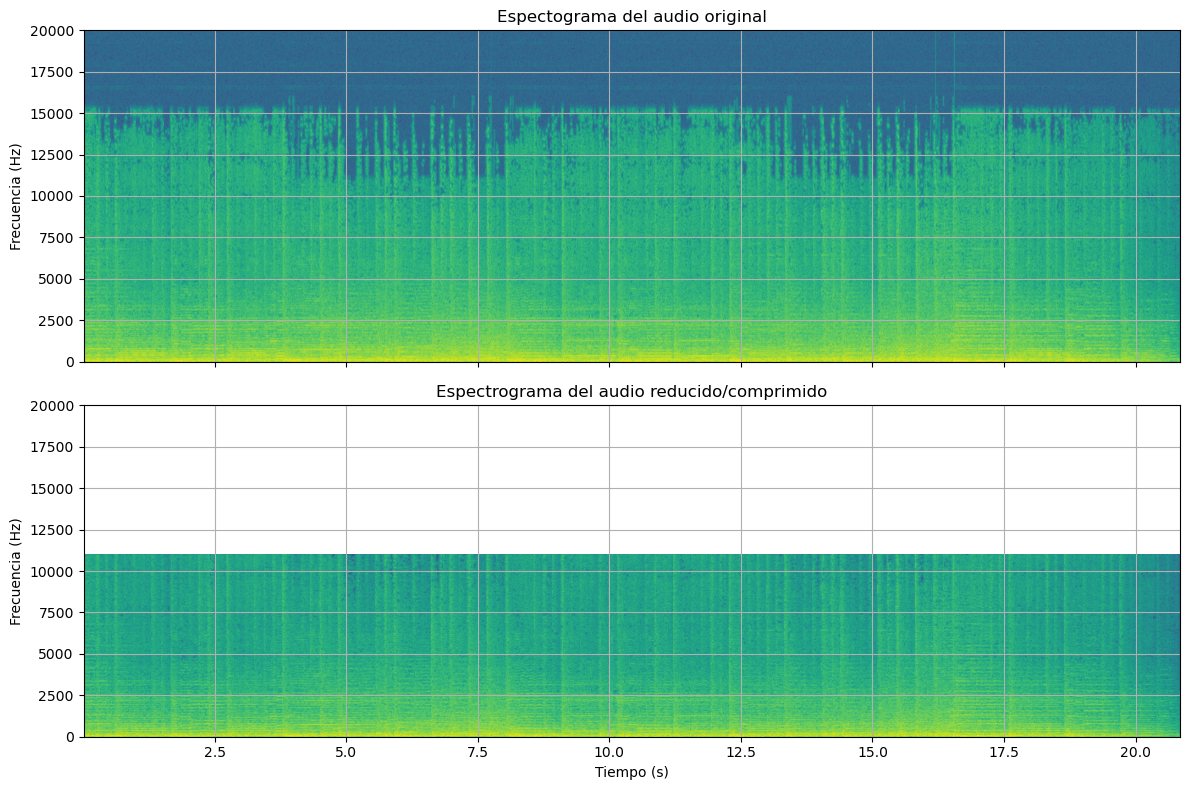

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

Pxx, freqs, bins, im = ax[0].specgram(audio_mono, NFFT=1024, Fs=sr, noverlap=512)
ax[0].set_title('Espectograma del audio original')
ax[0].set_ylabel('Frecuencia (Hz)')
ax[0].grid(True)

Pxx, freqs, bins, im = ax[1].specgram(audio_comprimido, NFFT=1024, Fs=sr_comprimido, noverlap=512)
ax[1].set_title('Espectrograma del audio reducido/comprimido')
ax[1].set_xlabel('Tiempo (s)')
ax[1].set_ylabel('Frecuencia (Hz)')
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [11]:
size_original_mb = round(audio_mono.nbytes / (1024 * 1024), 2)   
size_comprimido_mb = round(audio_comprimido.nbytes / (1024 * 1024), 2)  
print(f"Tamaño del audio original: {size_original_mb} MB")         
print(f"Tamaño del audio comprimido: {size_comprimido_mb} MB")       

Tamaño del audio original: 3.51 MB
Tamaño del audio comprimido: 1.75 MB


In [12]:
print("Audio Original:")
ipd.display(ipd.Audio(data=audio_mono, rate=sr))    

print("Audio Comprimido:")
ipd.display(ipd.Audio(data=audio_comprimido, rate=sr_comprimido))  


Audio Original:


Audio Comprimido:
